In [1]:
from pyAudioAnalysis import audioTrainTest as aT
from pyAudioAnalysis import MidTermFeatures as aF
from pyAudioAnalysis import audioAnalysis as aA
from pathlib import Path
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from pydub import AudioSegment

In [6]:
directory_in_str = "emotionData/Individual"
pathlist = Path(directory_in_str).glob('**/*.wav')

listOfDirs = []
for path in pathlist:
    path_in_str = str(path)
    parent = path.parents[0]
    print(path_in_str
    AudioSegment.from_wav('./' + path_in_str.replace('\\', '/')).export("./outputdata/" + path_in_str.replace('\\', '/').split('.')[0] + '.mp3', format="mp3")
    if str(parent) not in listOfDirs:
        listOfDirs.append(str(parent))

mtWin = 1.0
mtStep = 1.0
stWin = aT.shortTermWindow
stStep = aT.shortTermStep
classifierType = "svm"
modelName = "models/svm_1v1_1.0.0"
beat = False

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [3]:
features, class_names, file_names, feature_names = aF.multiple_directory_feature_extraction(listOfDirs, mtWin, mtStep, stWin, stStep, beat)

dual\Relief\Voice_Mary_Relief_67.wav
Analyzing file 120 of 154: emotionData\Individual\Relief\Voice_Mary_Relief_68.wav
Analyzing file 121 of 154: emotionData\Individual\Relief\Voice_Mary_Relief_69.wav
Analyzing file 122 of 154: emotionData\Individual\Relief\Voice_Mary_Relief_7.wav
Analyzing file 123 of 154: emotionData\Individual\Relief\Voice_Mary_Relief_70.wav
Analyzing file 124 of 154: emotionData\Individual\Relief\Voice_Mary_Relief_71.wav
Analyzing file 125 of 154: emotionData\Individual\Relief\Voice_Mary_Relief_72.wav
Analyzing file 126 of 154: emotionData\Individual\Relief\Voice_Mary_Relief_73.wav
Analyzing file 127 of 154: emotionData\Individual\Relief\Voice_Mary_Relief_74.wav
Analyzing file 128 of 154: emotionData\Individual\Relief\Voice_Mary_Relief_75.wav
Analyzing file 129 of 154: emotionData\Individual\Relief\Voice_Mary_Relief_76.wav
Analyzing file 130 of 154: emotionData\Individual\Relief\Voice_Mary_Relief_77.wav
Analyzing file 131 of 154: emotionData\Individual\Relief\Voice

In [4]:
print(np.array(features).shape)
print(features[0].shape)
print(class_names)
print()
print(feature_names[0])
print(feature_names[0].index('zcr_std'))
print(len(feature_names))

[array([[5.74546279e-02, 5.64723691e-02, 3.07865677e+00, ...,
        3.47235547e-02, 1.28095213e-02, 1.77069373e-02],
       [5.51828116e-02, 2.44384684e-02, 3.23502409e+00, ...,
        1.49487696e-02, 1.22891756e-02, 1.17438240e-02],
       [5.03901996e-02, 1.60443258e-02, 3.20360992e+00, ...,
        1.07215560e-02, 8.30046003e-03, 1.25767991e-02],
       ...,
       [2.61658096e-02, 2.57610876e-02, 3.25658561e+00, ...,
        9.60900906e-03, 1.97207701e-03, 1.29073218e-02],
       [2.91680416e-02, 2.72746822e-02, 3.22643853e+00, ...,
        1.83786286e-02, 1.83244079e-02, 1.38961830e-02],
       [6.19305808e-02, 4.02192860e-02, 3.18231847e+00, ...,
        2.84137218e-02, 2.96983398e-02, 1.79938267e-02]])
 array([[1.22043255e-01, 4.92152379e-03, 2.92842844e+00, ...,
        2.11296503e-02, 4.29959220e-03, 1.92345033e-02],
       [1.09823049e-01, 9.20257965e-03, 3.04736300e+00, ...,
        2.39266665e-02, 5.59627139e-03, 1.28780799e-02],
       [8.23077359e-02, 2.10845671e-02, 2

[0.03188714460403986, 0.027749552292177914, 0.03300470304576695, 0.04579317724592778, 0.03544735469002062, 0.048337085782626896, 0.04486416238866825, 0.027628215207651137, 0.042460421068383825, 0.050155436559051, 0.03293871970945491, 0.04217723642996945, 0.0315357082517926, 0.044059494967965095, 0.04112700147102822, 0.04204419363630578, 0.05015637884869981, 0.030190318865241622, 0.04651436725083072, 0.04637005821823429]
[0.014093410034838, 0.014297511636625607, 0.01221878406177577, 0.013602959580692521, 0.01253320677464221, 0.014381564978245396, 0.011274511228750679, 0.01186114785956414, 0.014152348259332575, 0.01340216513534146, 0.013944270668021527, 0.01511360176946771, 0.015072854669266326, 0.01518821292137975, 0.013272955078437017, 0.014259576213633385, 0.012703439638421372, 0.014319159440561348, 0.013506036419792436, 0.013557119879483204]


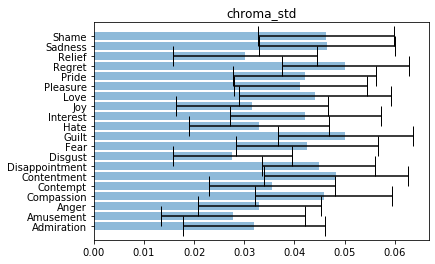

In [36]:
means = []
stds = []
f_name = 'chroma_std'
for i, emotion in enumerate(features):
    #Ask about standard deviation of the mean. Should these stds be divided by /sqrt{N}?
    means.append(np.mean(emotion[:,feature_names[i].index('{}_mean'.format(f_name))]))
    stds.append(np.mean(emotion[:,feature_names[i].index('{}_std'.format(f_name))]))
print(means)
print(stds)
fig, ax = plt.subplots()
ax.barh(class_names, means, xerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_title(f_name)

plt.show()

On zcr_mean


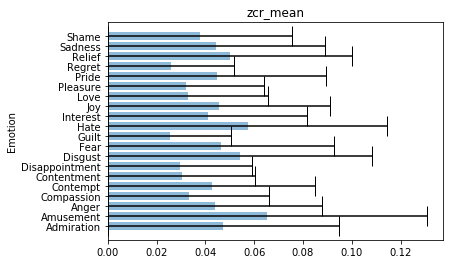

On energy_mean


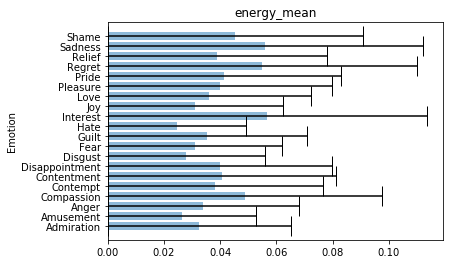

On energy_entropy_mean


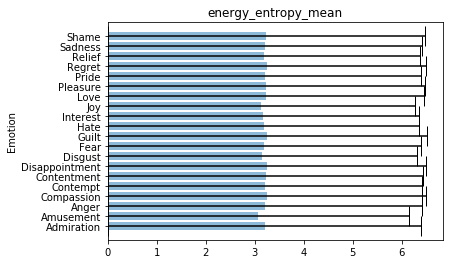

On spectral_centroid_mean


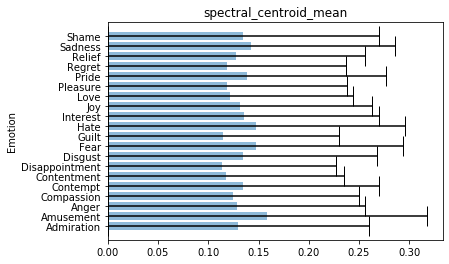

On spectral_spread_mean


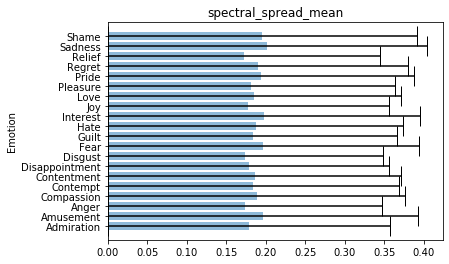

On spectral_entropy_mean


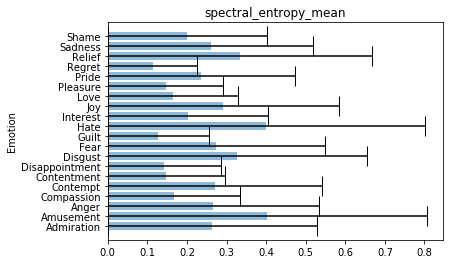

On spectral_flux_mean


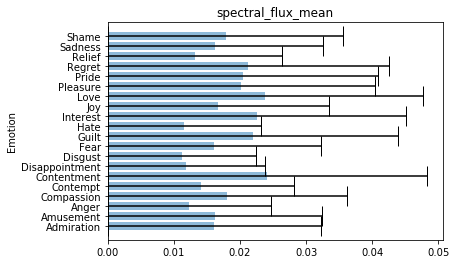

On spectral_rolloff_mean


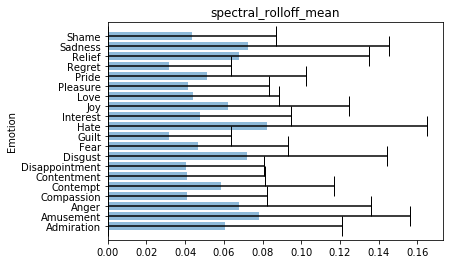

On mfcc_1_mean


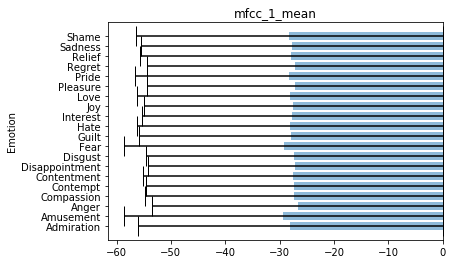

On mfcc_2_mean


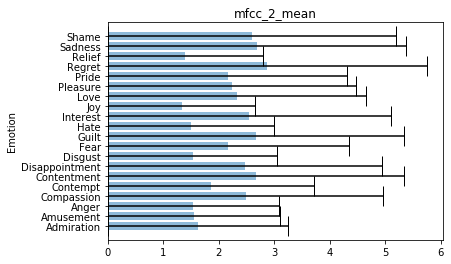

On mfcc_3_mean


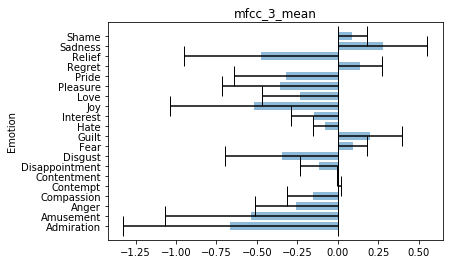

On mfcc_4_mean


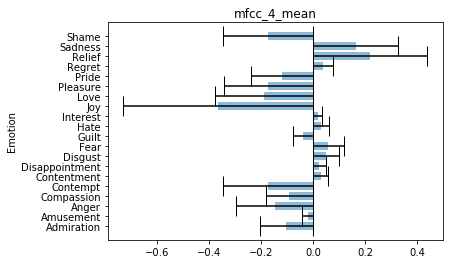

On mfcc_5_mean


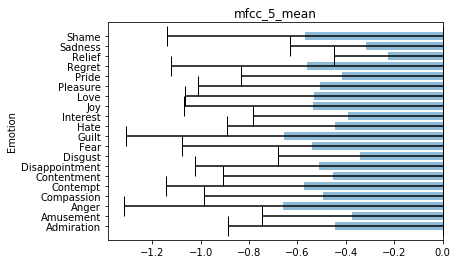

On mfcc_6_mean


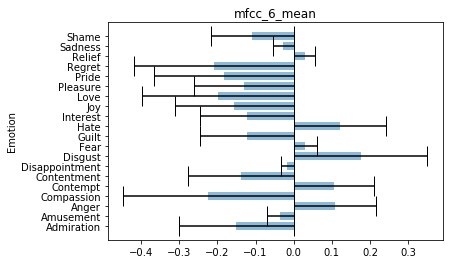

On mfcc_7_mean


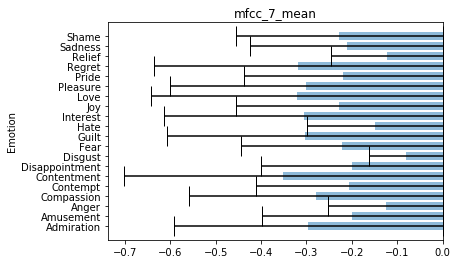

On mfcc_8_mean


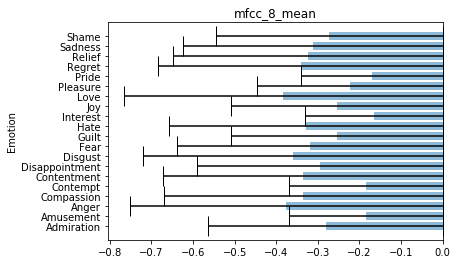

On mfcc_9_mean


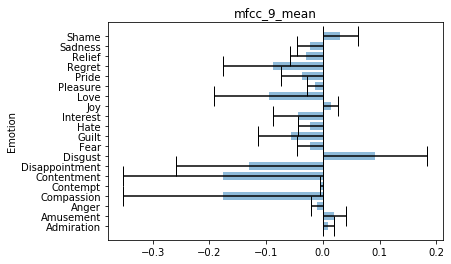

On mfcc_10_mean


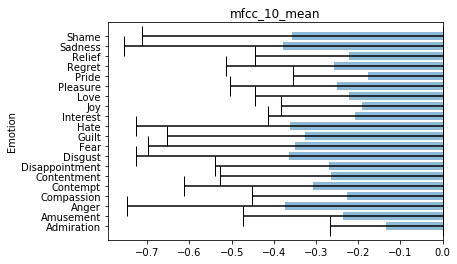

On mfcc_11_mean


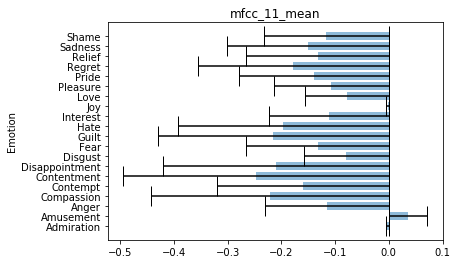

On mfcc_12_mean


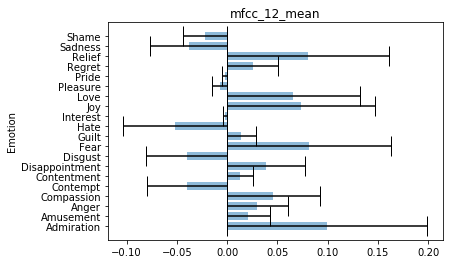

On mfcc_13_mean


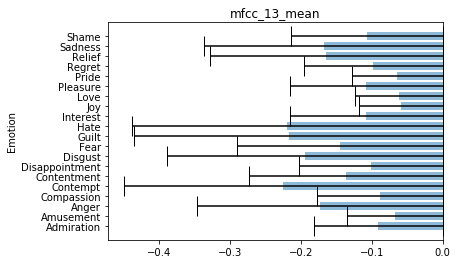

On chroma_1_mean


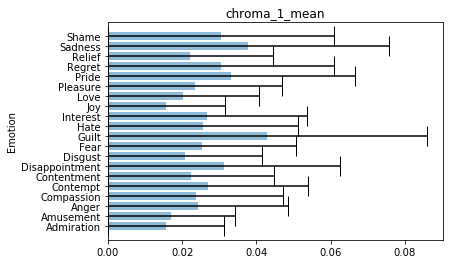

On chroma_2_mean


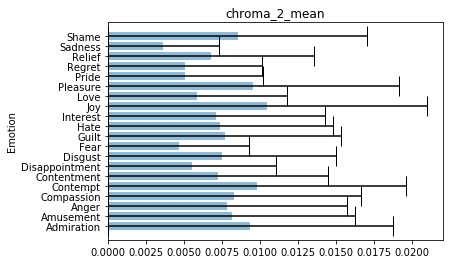

On chroma_3_mean


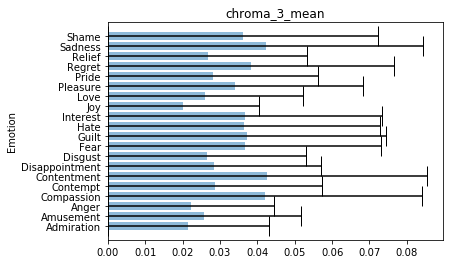

On chroma_4_mean


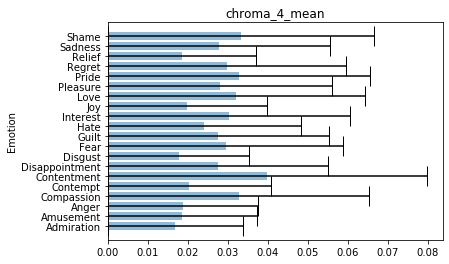

On chroma_5_mean


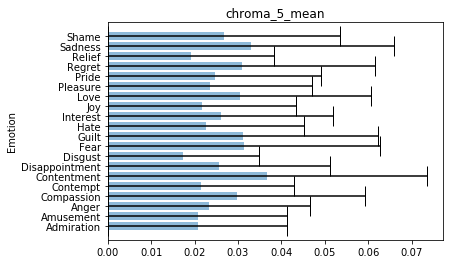

On chroma_6_mean


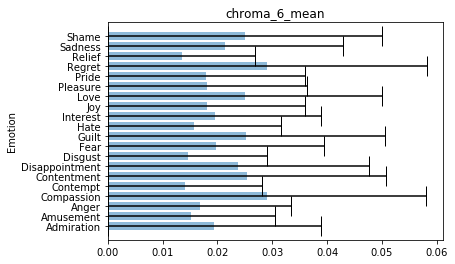

On chroma_7_mean


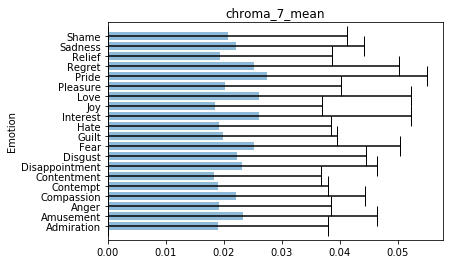

On chroma_8_mean


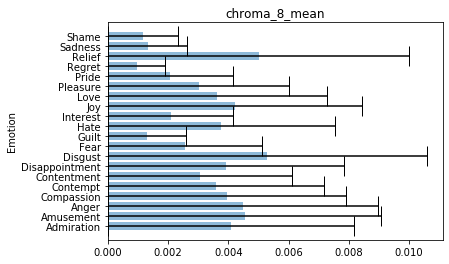

On chroma_9_mean


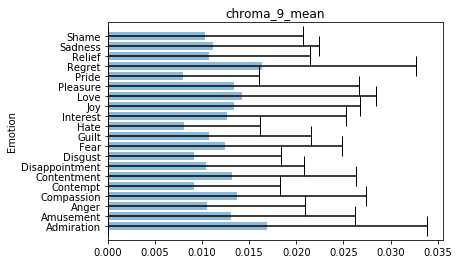

On chroma_10_mean


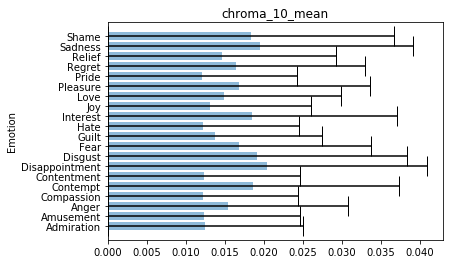

On chroma_11_mean


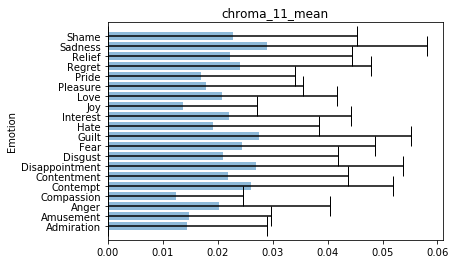

On chroma_12_mean


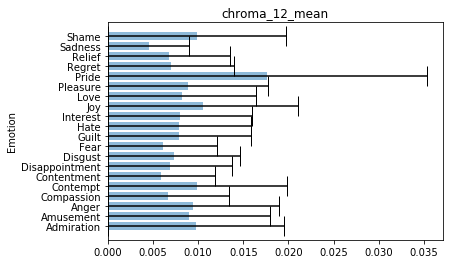

On chroma_std_mean


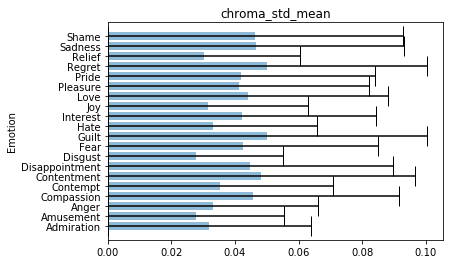

On delta zcr_mean


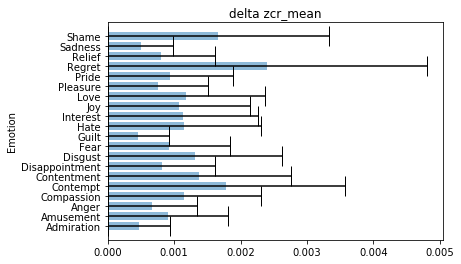

On delta energy_mean


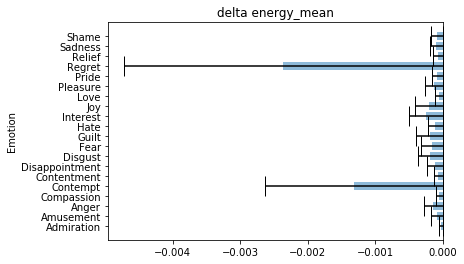

On delta energy_entropy_mean


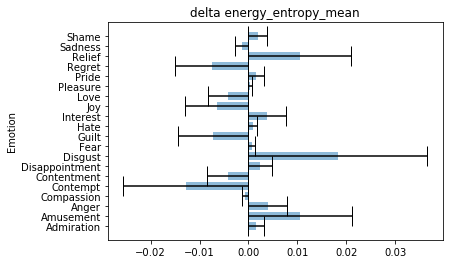

On delta spectral_centroid_mean


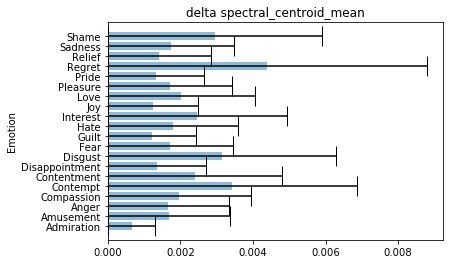

On delta spectral_spread_mean


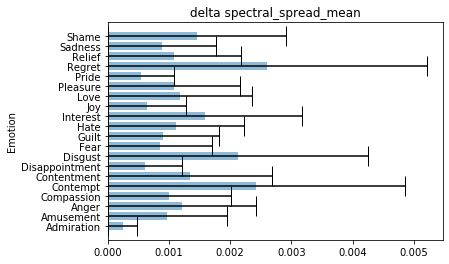

On delta spectral_entropy_mean


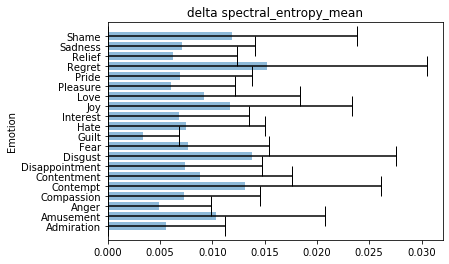

On delta spectral_flux_mean


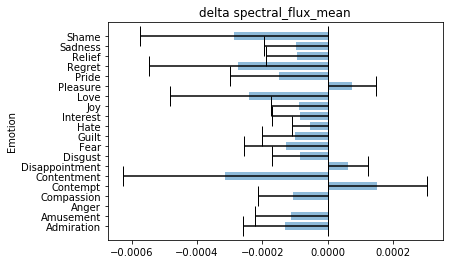

On delta spectral_rolloff_mean


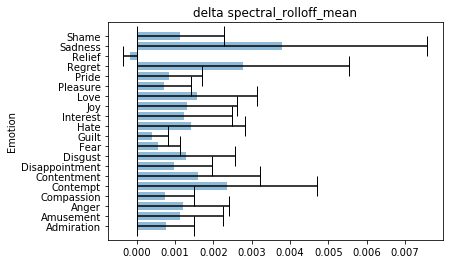

On delta mfcc_1_mean


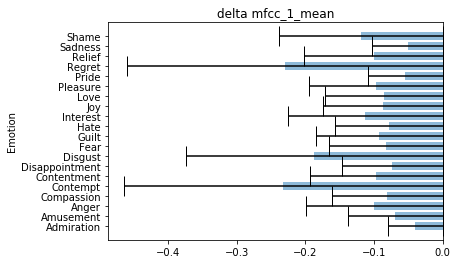

On delta mfcc_2_mean


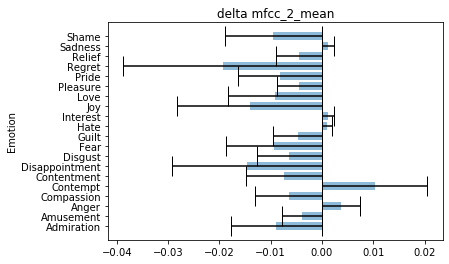

On delta mfcc_3_mean


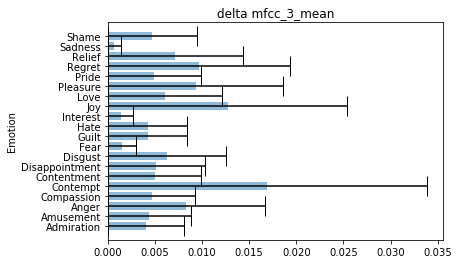

On delta mfcc_4_mean


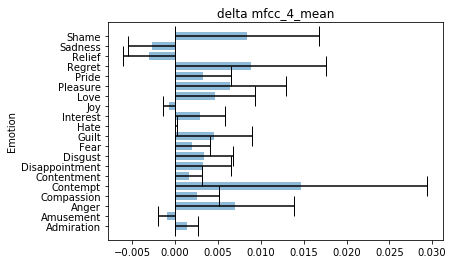

On delta mfcc_5_mean


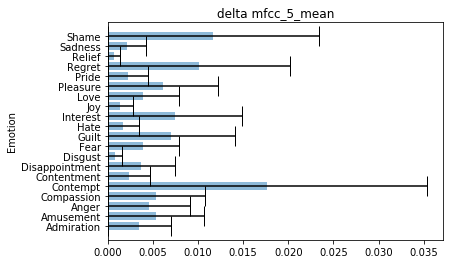

On delta mfcc_6_mean


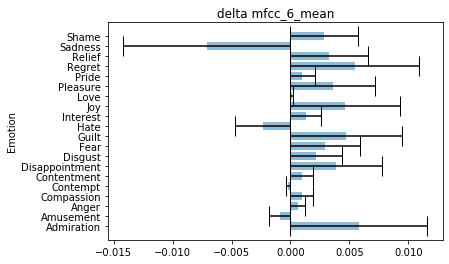

On delta mfcc_7_mean


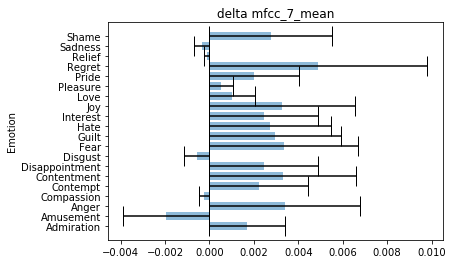

On delta mfcc_8_mean


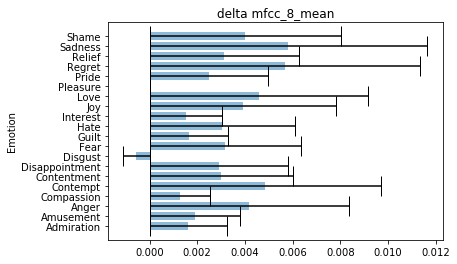

On delta mfcc_9_mean


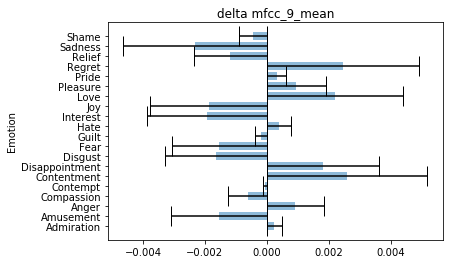

On delta mfcc_10_mean


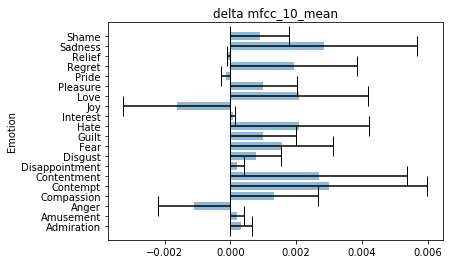

On delta mfcc_11_mean


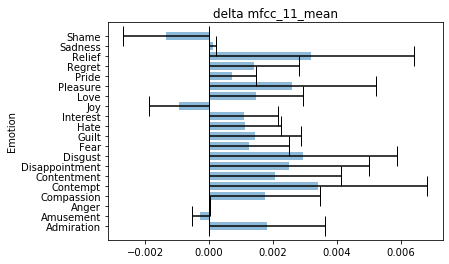

On delta mfcc_12_mean


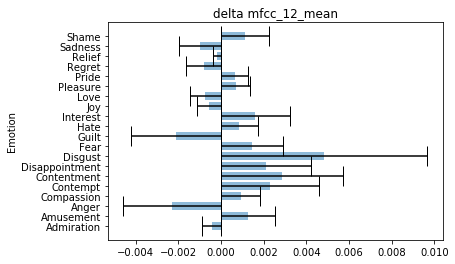

On delta mfcc_13_mean


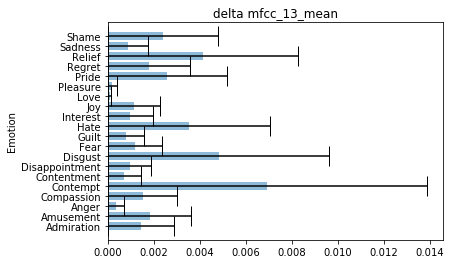

On delta chroma_1_mean


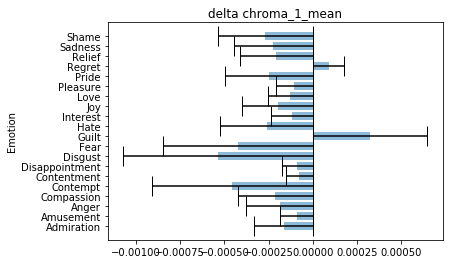

On delta chroma_2_mean


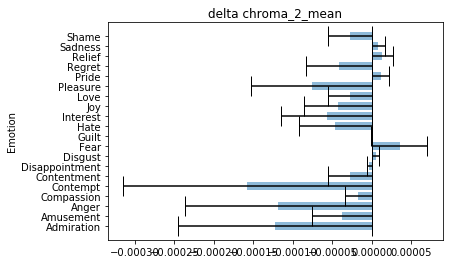

On delta chroma_3_mean


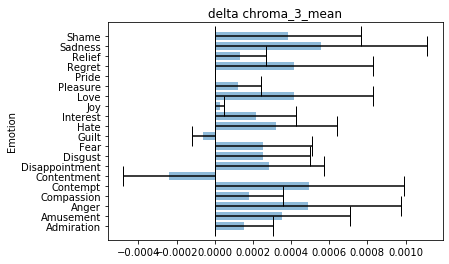

On delta chroma_4_mean


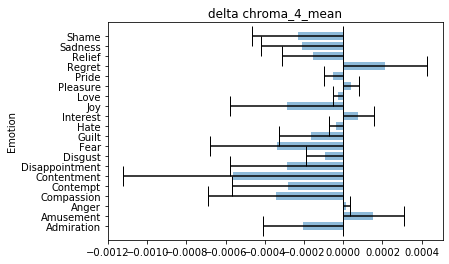

On delta chroma_5_mean


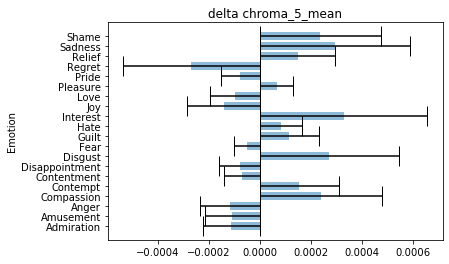

On delta chroma_6_mean


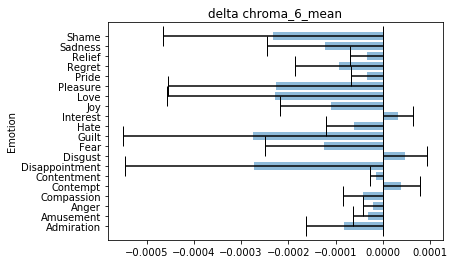

On delta chroma_7_mean


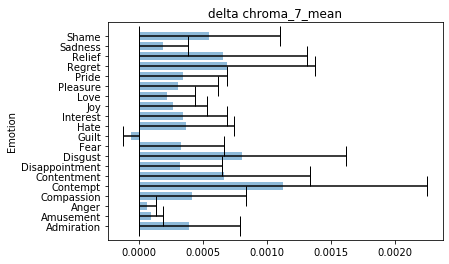

On delta chroma_8_mean


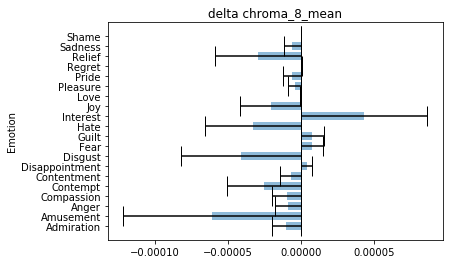

On delta chroma_9_mean


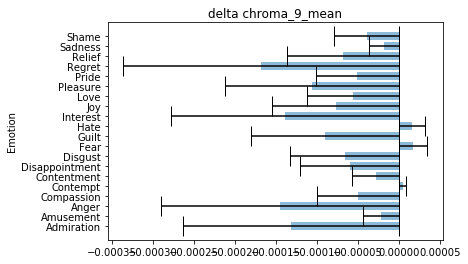

On delta chroma_10_mean


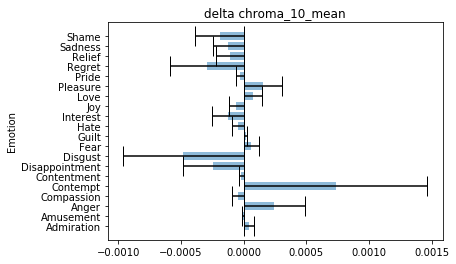

On delta chroma_11_mean


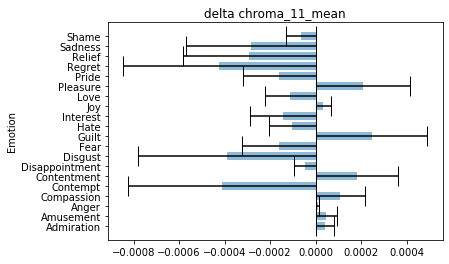

On delta chroma_12_mean


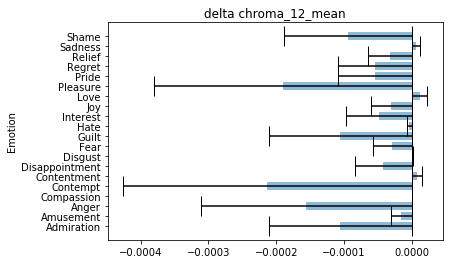

On delta chroma_std_mean


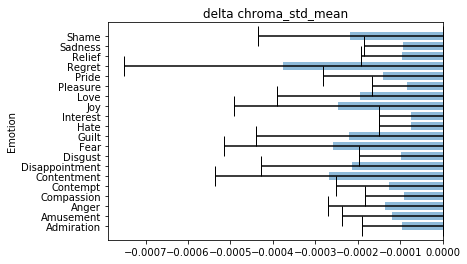

In [27]:
 
for j in range(len(feature_names[0]) // 2):

    print('On {}'.format(feature_names[0][j]))
    means = []
    stds = []
    f_name = feature_names[0][j]
    for i, emotion in enumerate(features):
        means.append(np.mean(emotion[:,feature_names[i].index(f_name)]))
        stds.append(np.mean(emotion[:,feature_names[i].index(f_name)]))
    fig, ax = plt.subplots()
    ax.barh(class_names, means, xerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_title(f_name)
    ax.set_ylabel('Emotion')
    ax.set_yticklabels(class_names)
    plt.show()

In [7]:
print(feature_names[0])

[&#39;zcr_mean&#39;, &#39;energy_mean&#39;, &#39;energy_entropy_mean&#39;, &#39;spectral_centroid_mean&#39;, &#39;spectral_spread_mean&#39;, &#39;spectral_entropy_mean&#39;, &#39;spectral_flux_mean&#39;, &#39;spectral_rolloff_mean&#39;, &#39;mfcc_1_mean&#39;, &#39;mfcc_2_mean&#39;, &#39;mfcc_3_mean&#39;, &#39;mfcc_4_mean&#39;, &#39;mfcc_5_mean&#39;, &#39;mfcc_6_mean&#39;, &#39;mfcc_7_mean&#39;, &#39;mfcc_8_mean&#39;, &#39;mfcc_9_mean&#39;, &#39;mfcc_10_mean&#39;, &#39;mfcc_11_mean&#39;, &#39;mfcc_12_mean&#39;, &#39;mfcc_13_mean&#39;, &#39;chroma_1_mean&#39;, &#39;chroma_2_mean&#39;, &#39;chroma_3_mean&#39;, &#39;chroma_4_mean&#39;, &#39;chroma_5_mean&#39;, &#39;chroma_6_mean&#39;, &#39;chroma_7_mean&#39;, &#39;chroma_8_mean&#39;, &#39;chroma_9_mean&#39;, &#39;chroma_10_mean&#39;, &#39;chroma_11_mean&#39;, &#39;chroma_12_mean&#39;, &#39;chroma_std_mean&#39;, &#39;delta zcr_mean&#39;, &#39;delta energy_mean&#39;, &#39;delta energy_entropy_mean&#39;, &#39;delta spectral_centroid_mean&#39;